In [82]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [203]:
hs = pd.read_csv('D:\download\housing2.csv')
data = pd.DataFrame (hs)

In [204]:
summary = hs.describe()
print(summary)

             ATT1        ATT2        ATT3        ATT4        ATT5        ATT6  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.518457    0.500422    0.507451    0.498543    0.525487    0.508831   
std      0.283847    0.298752    0.289607    0.294229    0.283387    0.282400   
min      0.000727    0.000321    0.000013    0.001541    0.003970    0.000679   
25%      0.272918    0.235879    0.244897    0.229861    0.283208    0.276366   
50%      0.521326    0.485701    0.526014    0.506543    0.514982    0.509443   
75%      0.770235    0.774921    0.750546    0.757517    0.772218    0.730899   
max      0.995798    0.999265    0.998746    0.995561    0.998635    0.998194   

             ATT7        ATT8        ATT9       ATT10  ...         NOX  \
count  506.000000  506.000000  506.000000  506.000000  ...  506.000000   
mean     0.501997    0.509998    0.480159    0.501922  ...    0.554695   
std      0.287986    0.290160    0.301086    0.2

In [206]:
nrow= len(data.index)
ncol= len(data.columns)
print("Number of Rows of Data =" , nrow, '\n')
print("Number of Columns of Data =" ,ncol)

Number of Rows of Data = 506 

Number of Columns of Data = 27


In [207]:
#Determine which attributes are categorical and which are numeric
data.dtypes

ATT1       float64
ATT2       float64
ATT3       float64
ATT4       float64
ATT5       float64
ATT6       float64
ATT7       float64
ATT8       float64
ATT9       float64
ATT10      float64
ATT11      float64
ATT12      float64
ATT13      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

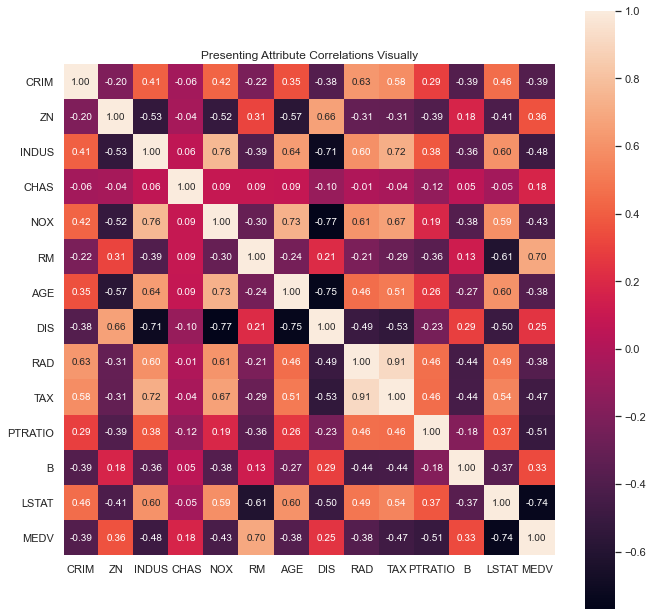

In [210]:
#Presenting Attribute Correlations Visually
import seaborn as sns
cols= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
corr = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(11,11))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},yticklabels=cols,xticklabels=cols)
plt.pcolor(corr)
plt.title('Presenting Attribute Correlations Visually')
plt.show()

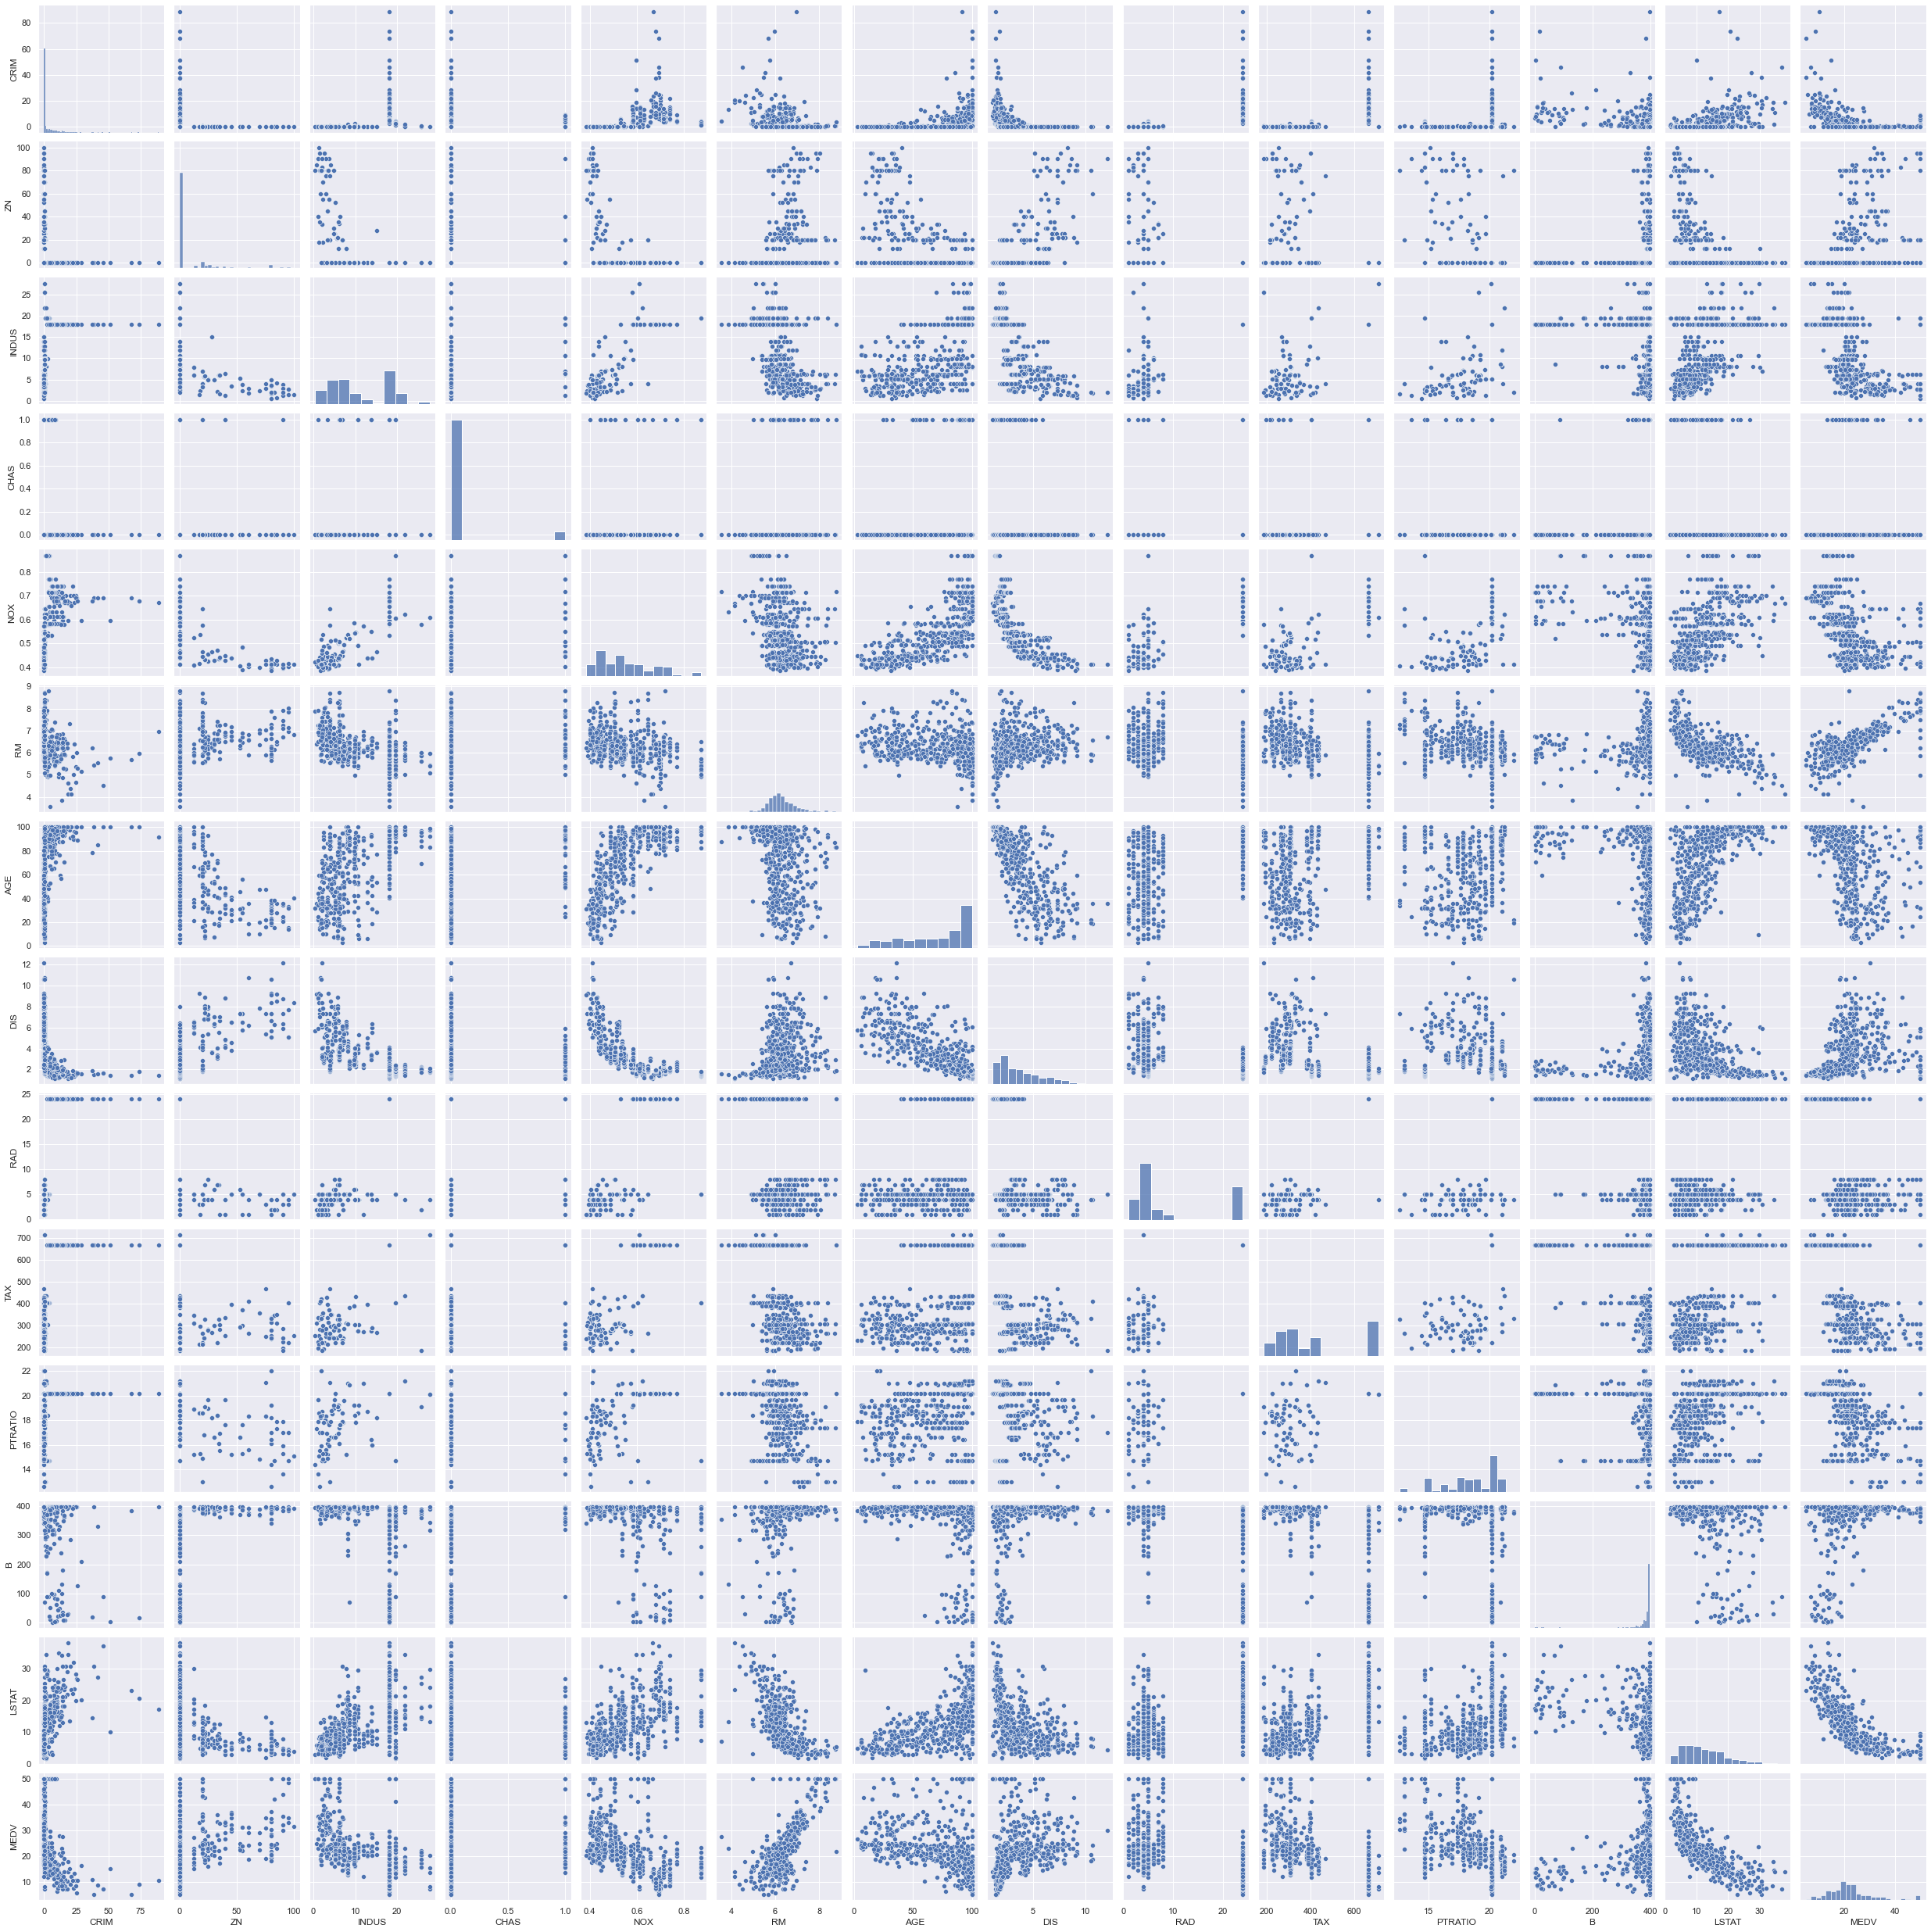

In [211]:
sns.pairplot(data[cols])
plt.show()

In [89]:
def lin_plot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

 Slope: [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
  Intercept: 29.01184117293089


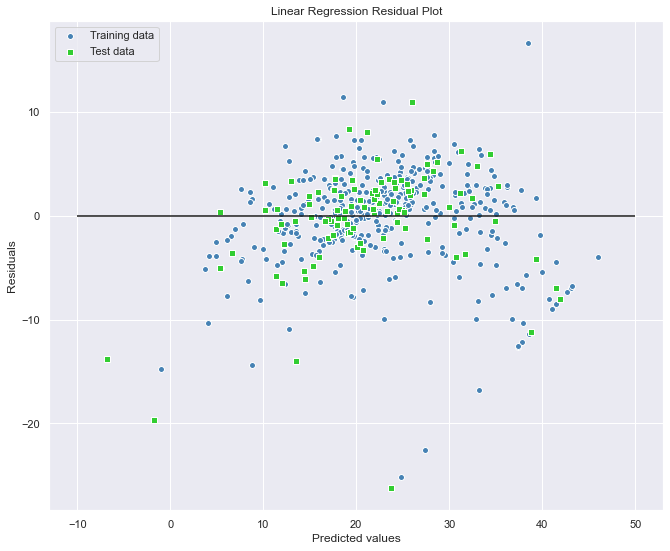

MSE train:  20.612846807058926
MSE test:  26.63023048426116
R2 train:  0.762725461446246
R2 test:  0.636862720882108


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Linear Regression
X= data.iloc[:,:-1].values
y= data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state= 42)
reg= LinearRegression()
reg.fit(X_train, y_train)

y_train_pred= reg.predict (X_train)
y_test_pred= reg.predict(X_test) 
print (' Slope:',reg.coef_)
print ('  Intercept:',reg.intercept_)

plt.figure(figsize=(11,9))
plt.scatter(y_train_pred,y_train_pred - y_train, label='Training data',c='steelblue',marker='o',edgecolor='white')
plt.scatter(y_test_pred, y_test_pred - y_test , label='Test data',c='limegreen',marker='s',edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='k')
plt.title ('Linear Regression Residual Plot')
plt.show()

#MSE
print("MSE train: ",mean_squared_error(y_train,y_train_pred))
print("MSE test: ",mean_squared_error(y_test,y_test_pred))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

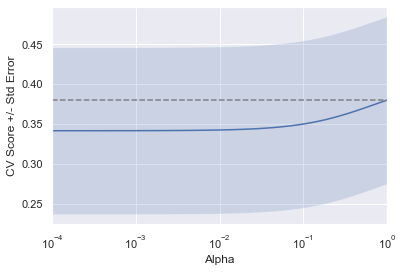

best alpha 1.0


In [213]:
#ridge cross validation 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space =np.logspace(-4,0,50)
ridge_scores=[]
ridge_scores_std=[]
ridge=Ridge(True)

for alpha in alpha_space:
    ridge.alpha=alpha
    ridge_cv_scores= cross_val_score(ridge, X,y,cv=5)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    min_cv=max(cv_scores)
    print('best alpha',alpha_space[cv_scores.index(min_cv)])
    

display_plot(ridge_scores, ridge_scores_std)

 Slope: [ 2.77373123e+00 -3.82433590e-01  4.70456349e-01 -9.21596625e-02
 -8.96588771e-01 -6.46267774e-01  6.74233913e-01 -2.20624295e-01
 -1.08597427e-01 -9.50586870e-01 -9.87958643e-01  4.31114300e-01
 -2.37120018e-01 -1.22348931e-01  3.47393776e-02  6.34638237e-03
  2.50280106e+00 -9.30540495e+00  4.49372773e+00 -1.23981226e-02
 -1.36228016e+00  2.42509866e-01 -1.13475917e-02 -8.04222787e-01
  1.33040476e-02 -5.17744363e-01]
  Intercept: 24.22024857679099


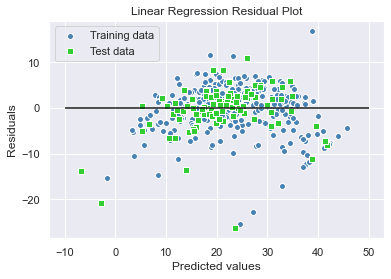

MSE train:  20.793083861425604
MSE test:  26.826564073412577
R2 train:  0.7606507521979099
R2 test:  0.6341854610887303


In [214]:
#ridge
ridge = Ridge(1)
X= data.iloc[:,:-1].values
y= data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state= 42)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict (X_train)
y_test_pred= ridge.predict(X_test) 
print (' Slope:',ridge.coef_)
print ('  Intercept:',ridge.intercept_)
    
plt.scatter(y_train_pred,y_train_pred - y_train, label='Training data',c='steelblue',marker='o',edgecolor='white')
plt.scatter(y_test_pred, y_test_pred - y_test , label='Test data',c='limegreen',marker='s',edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='k')
plt.title ('Linear Regression Residual Plot')
plt.show()

#MSE
print("MSE train: ",mean_squared_error(y_train,y_train_pred))
print("MSE test: ",mean_squared_error(y_test,y_test_pred))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

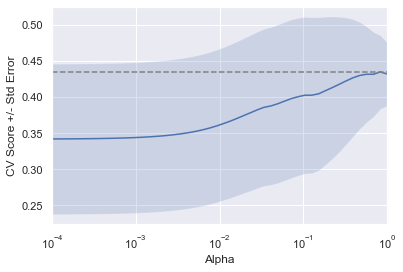

best alpha 0.8286427728546842


In [222]:
#lasso cross validation
from sklearn.linear_model import Lasso

alpha_space =np.logspace(-4,0,50)
ridge_scores=[]
ridge_scores_std=[]
ridge=Lasso(True)

for alpha in alpha_space:
    ridge.alpha=alpha
    ridge_cv_scores= cross_val_score(ridge, X,y,cv=5)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    min_cv=max(cv_scores)
    print('best alpha',alpha_space[cv_scores.index(min_cv)])
    

display_plot(ridge_scores, ridge_scores_std)

 Slope: [ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.08223179  0.02985715 -0.          0.         -0.
  2.14690335  0.01034636 -0.73128419  0.22533069 -0.01253342 -0.71563486
  0.01158429 -0.71323586]
  Intercept: 32.086487915073484


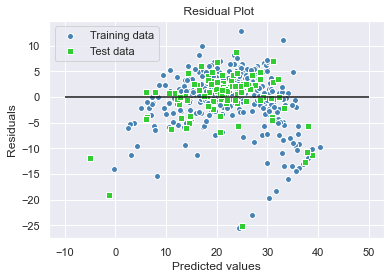

MSE train:  25.32463321894768
MSE test:  24.189662852394022
R2 train:  0.7084880745821523
R2 test:  0.6701429844481039


In [216]:
X= data.iloc[:,:-1].values
y= data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state= 42)
lasso= Lasso(0.828642)
lasso.fit(X_train, y_train)

y_train_pred= lasso.predict (X_train)
y_test_pred= lasso.predict(X_test) 
print (' Slope:',lasso.coef_)
print ('  Intercept:',lasso.intercept_)
    
plt.scatter(y_train_pred,y_train_pred - y_train, label='Training data',c='steelblue',marker='o',edgecolor='white')
plt.scatter(y_test_pred, y_test_pred - y_test , label='Test data',c='limegreen',marker='s',edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='k')
plt.title (' Residual Plot')
plt.show()

#MSE
print("MSE train: ",mean_squared_error(y_train,y_train_pred))
print("MSE test: ",mean_squared_error(y_test,y_test_pred))

#R2 score
print("R2 train: ", r2_score(y_train,y_train_pred))
print("R2 test: ", r2_score(y_test,y_test_pred))

In [217]:
print("My name is Yuanqing Guo")
print("My NetID is: yg8")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yuanqing Guo
My NetID is: yg8
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
